<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222">
<center><p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p></center>
<center><p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p></center>
    
<br>
<br>   
<br>
<br>
<br>
<br>   

<h1 style="text-align: center"> Midterm Project </h1>
<h1 style="text-align: center"> Data Science Programming 2</h1> 
 
<br>
<br>
<br>
<br>
<br>


<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2008</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Alua Onayeva,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Ayazhan Sydyk, </h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Aibolsyn Aibekkyzy</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Kaisar Mussalim</p>

<br>
<br>
<br>
<br>

<p style="text-align: center; font-size: 15px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>

# Outline:

### [1. Data and Task presentation](#section1)
  - ### [1.1  Exploring the Dataset](#section11)
  - ### [1.2  Exploratory Data Analysis(EDA)](#section12)
  
### [2. Data Preprocessing](#section2)
- ### [2.1 Data Cleaning](#section21)
- ### [2.2 Dealing with Outliers](#section22)
- ### [2.3 Feature Engineering ](#section23)
- ### [2.4 Dealing with missing values](#section24)
     - ### [2.4.1 'OtherDatabases' column](#section241)
     - ### [2.4.2 'Gender' column](#section242)
     - ### [2.4.3 'OtherJobDuties' column](#section243)
     - ### [2.4.4 'KindsOfTasksPerformed' column](#section244)
     - ### [2.4.5 'Education' column](#section245)
- ### [2.5 Correlation Matrix](#section25)    

### [3. Models](#section3)
- ### [3.1 Feature Selection](#section31)
- ### [3.2 Linear Regression](#section32)
- ### [3.3 Polynomial Regression](#section33)
- ### [3.4 Ridge Regression](#section34)
- ### [3.5 Lasso Regression](#section35)
- ### [3.6 Random Forest Regressor](#section36)
- ### [3.7 K Neighbors Regressor](#section37)

### [4. Conclusion](#section4)



In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Evaluation criteria:

1. Data and task presentation - 10%
2. Data preprocessing - 20%
3. Model (variety, difficulties, improvement) - 30%
4. Code quality - 10%
5. Results and Defence - 30%

## <a id='section1'>1. Task Description</a>

In this work we are going to use different models of machine learning in order to predict the salary of the Data Scientists.

## <a id='section11'>1.1 Exploring the dataset</a>

__Comment:__ This is a dataset about the salaries of Data Scientists.

In [3]:
data = pd.read_excel('salary.xlsx')
data.head()

,Survey Year,Timestamp,SalaryUSD,Country,PostalCode,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,...,HoursWorkedPerWeek,TelecommuteDaysPerWeek,PopulationOfLargestCityWithin20Miles,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Counter
0,2017,2017-01-05 05:10:20.451,200000,United States,Not Asked,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,...,45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
1,2017,2017-01-05 05:26:23.388,61515,United Kingdom,Not Asked,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,...,35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked,1
2,2017,2017-01-05 05:32:57.367,95000,Germany,Not Asked,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,...,45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
3,2017,2017-01-05 05:33:03.316,56000,United Kingdom,Not Asked,Microsoft SQL Server,6,NaN,Full time employee,DBA,...,40,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1
4,2017,2017-01-05 05:34:33.866,35000,France,Not Asked,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,...,40,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked,1


In [4]:
data.columns

Index(['Survey Year', 'Timestamp', 'SalaryUSD', 'Country', 'PostalCode',
       'PrimaryDatabase', 'YearsWithThisDatabase', 'OtherDatabases',
       'EmploymentStatus', 'JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob',
       'HowManyCompanies', 'OtherPeopleOnYourTeam', 'CompanyEmployeesOverall',
       'DatabaseServers', 'Education', 'EducationIsComputerRelated',
       'Certifications', 'HoursWorkedPerWeek', 'TelecommuteDaysPerWeek',
       'PopulationOfLargestCityWithin20Miles', 'EmploymentSector',
       'LookingForAnotherJob', 'CareerPlansThisYear', 'Gender',
       'OtherJobDuties', 'KindsOfTasksPerformed', 'Counter'],
      dtype='object')

#### Columns' description: 
- Survey Year - years when the survey was conducted.
- Timestamp - datetime when the form was filled.
- SalaryUSD - salary of the interviewee.
- Country - country of residence.
- PostalCode - postal code.
- PrimaryDatabase - primary database used
- YearsWithThisDatabase - how many years have been used this database?
- OtherDatabases - other databases used
- EmploymentStatus - employment status
- JobTitle - job title
- ManageStaff - whether or not they manage staff
- YearsWithThisTypeOfJob - years working in this type of job
- HowManyCompanies - how many companies have you worked for? 
- OtherPeopleOnYourTeam - how many people are on your team?
- CompanyEmployeesOverall - how many employees your company has?
- DatabaseServers - database servers
- Education - highest level of education
- EducationIsComputerRelated - whether education was computer related
- Certifications - certifications
- HoursWorkedPerWeek - how many hours worked per week
- TelecommuteDaysPerWeek - telecommute days per week
- PopulationOfLargestCityWithin20Miles - population of largest city within 20 miles
- EmploymentSector - employment sector
- LookingForAnotherJob - looking for another job?
- CareerPlansThisYear - what kind of career plans for this year?
- Gender - gender of employees
- OtherJobDuties - any other job duties
- KindsOfTasksPerformed - kinds of tasks performed
- Counter

In [5]:
data.shape

(6893, 29)

__Comment:__ We have got 6893 number of observations with 29 columns.

## <a id='section2'>2. Data preprocessing</a>

In [6]:
# counting null values in our dataset
data.isnull().sum()

Survey Year                                0
Timestamp                                  0
SalaryUSD                                  0
Country                                    0
PostalCode                               959
PrimaryDatabase                            0
YearsWithThisDatabase                      0
OtherDatabases                          1373
EmploymentStatus                           0
JobTitle                                   0
ManageStaff                                0
YearsWithThisTypeOfJob                     0
HowManyCompanies                           0
OtherPeopleOnYourTeam                      0
CompanyEmployeesOverall                    0
DatabaseServers                            0
Education                                  0
EducationIsComputerRelated              1216
Certifications                             0
HoursWorkedPerWeek                         0
TelecommuteDaysPerWeek                     0
PopulationOfLargestCityWithin20Miles       0
Employment

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Survey Year                           6893 non-null   int64         
 1   Timestamp                             6893 non-null   datetime64[ns]
 2   SalaryUSD                             6893 non-null   object        
 3   Country                               6893 non-null   object        
 4   PostalCode                            5934 non-null   object        
 5   PrimaryDatabase                       6893 non-null   object        
 6   YearsWithThisDatabase                 6893 non-null   int64         
 7   OtherDatabases                        5520 non-null   object        
 8   EmploymentStatus                      6893 non-null   object        
 9   JobTitle                              6893 non-null   object        
 10  

__Comment:__ Except for 5 columns, such as 'YearsWithThisTypeOfJob', 'DatabaseServers', other columns are categorical with the type of object.<br>
Even our targer variable __'SalaryUSD'__ is written as a string.

In [8]:
data['SalaryUSD'] = [float(str(val).replace(' ','').replace(',','')) for val in data['SalaryUSD'].values]

__Comment:__ So we converted _'SalaryUSD'_ column to float type. Some of the values also were in the form of 30 000 or 30,000.

## <a id='section12'>1.2 Exploratory Data Analysis (EDA)</a>

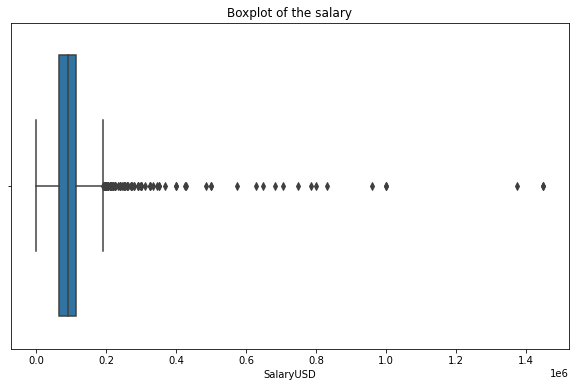

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x= data['SalaryUSD']).set(title='Boxplot of the salary');

__Comment:__ Here is our boxplot illustration of 'SalaryUSD' column. As it can be seen from the graph, we have too many outliers.

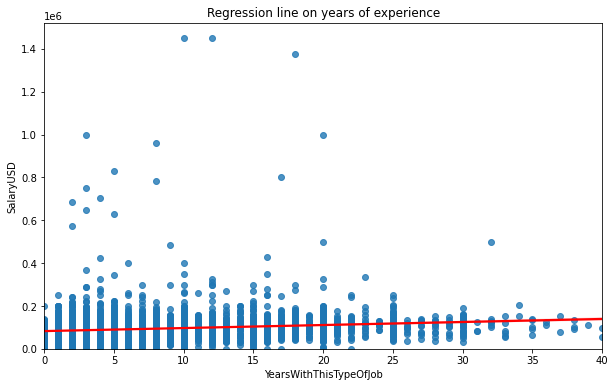

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(x='YearsWithThisTypeOfJob', y='SalaryUSD', data=data, 
            line_kws={'color':'red'}).set(title='Regression line on years of experience')
plt.ylim(0,);

__Comment:__ Depiction of regression line on 'YearsWithThisTypeOfJob' and 'SalaryUSD'.

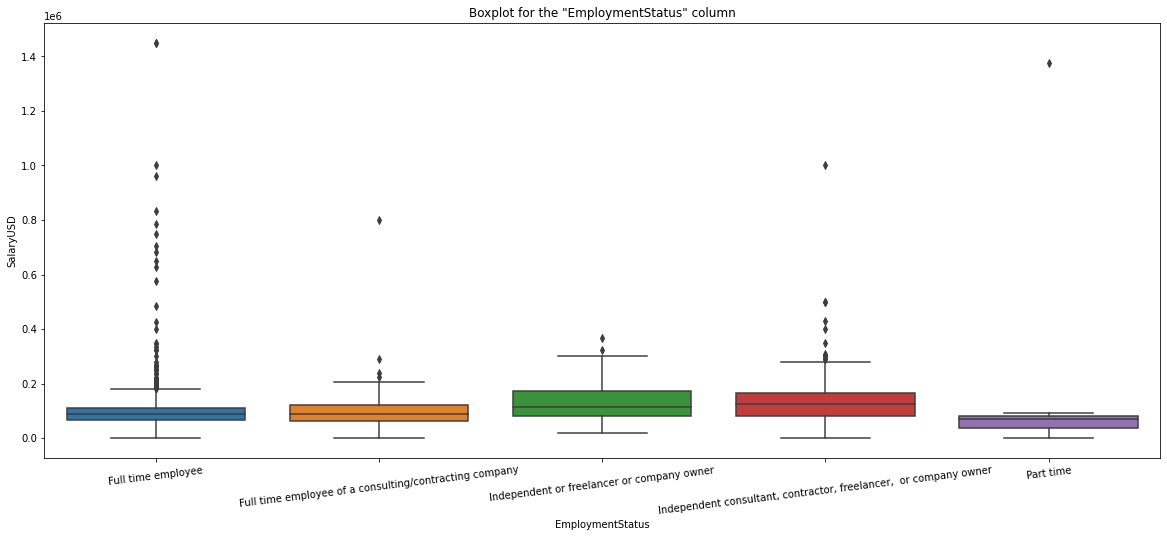

In [11]:
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x='EmploymentStatus', y='SalaryUSD', data=data).set(title='Boxplot for the "EmploymentStatus" column')
plt.xticks(rotation=7);

__Comment:__ The graph above illustrates that the median of all employment status are approximately the same, however for freelancers this indicator is much more higher. And in comparison with other statuses, it has the least number of outliers. We can came to opinion that freelancers salary is stable.

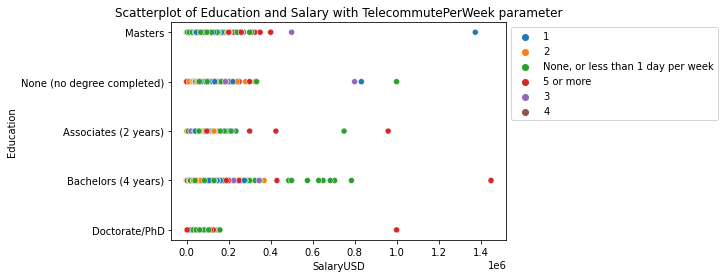

In [12]:
sns.scatterplot(data=data, x="SalaryUSD", y='Education', hue='TelecommuteDaysPerWeek').set(title='Scatterplot of Education and Salary with TelecommutePerWeek parameter')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

__Comment:__ The scatterplot above depicts us the relationship between Education and Salary, and as an additional parameter we took 'TelecommutePerWeek' variable. Doctorate's salary is the lowest compared to others. Green ones are those who have no telecommute work. People with a bachelor's degree have the highest and most diversed salary range unlike other Education types.

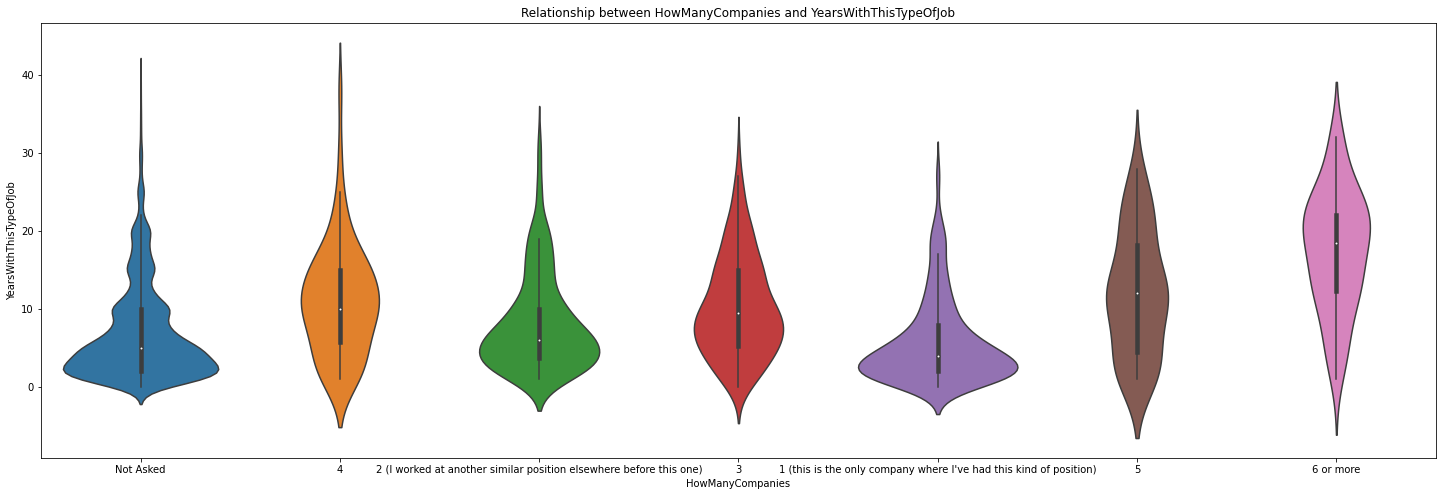

In [13]:
plt.figure(figsize=(25,8))
sns.violinplot(x=data["HowManyCompanies"], 
               y=data["YearsWithThisTypeOfJob"]).set(title='Relationship between HowManyCompanies and YearsWithThisTypeOfJob')
plt.show()

__Comment:__ The violinplot above shows relationship how many companies the person changed and the his/her years of experience.
It can be seen that people with more work experienced tend to change more companies, in our case '5' and '6 or more' category.

### Male and Female Salary Analysis

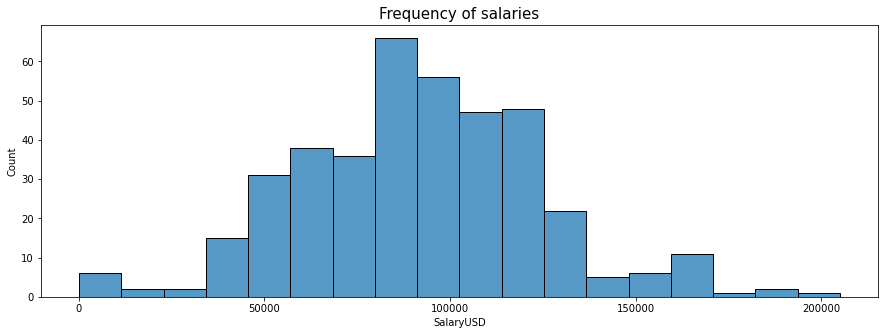

92000.0
0    85000.0
dtype: float64
91739.00733164557


In [14]:
data_woman=data[data.Gender=='Female']

fig, ((axes1)) = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data = data_woman, x = 'SalaryUSD', ax = axes1)
axes1.set_title('Frequency of salaries', fontsize=15)
plt.show()

print(data_woman.SalaryUSD.median())
print(data_woman.SalaryUSD.mode())
print(data_woman.SalaryUSD.mean())

__Comment:__ Salaries of the women seems to be approximate to normal distribution.

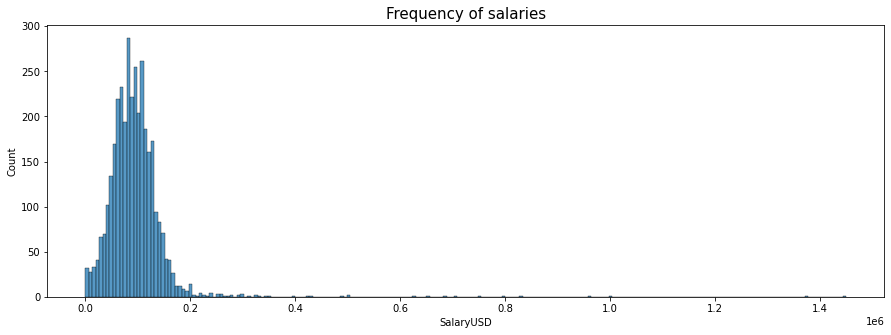

90000.0
0    110000.0
dtype: float64
94666.42680339944


In [15]:
data_man=data[data.Gender=='Male']

fig, ((axes1)) = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data = data_man, x = 'SalaryUSD', ax = axes1)
axes1.set_title('Frequency of salaries', fontsize=15)
plt.show()

print(data_man.SalaryUSD.median())
print(data_man.SalaryUSD.mode())
print(data_man.SalaryUSD.mean())

__Comment:__ However in men salaries we have a lot of outliers.

In [16]:
# sns.pairplot(data)

__Comment:__ Plot pairwise relationships of our dataset.

## <a id='section21'>2.1 Data Cleaning</a>

In [17]:
# unique values in dataset
data.nunique()

Survey Year                                3
Timestamp                               6891
SalaryUSD                               1240
Country                                   85
PostalCode                              2304
PrimaryDatabase                           15
YearsWithThisDatabase                     42
OtherDatabases                          1339
EmploymentStatus                           5
JobTitle                                  23
ManageStaff                                2
YearsWithThisTypeOfJob                    41
HowManyCompanies                           7
OtherPeopleOnYourTeam                      7
CompanyEmployeesOverall                    7
DatabaseServers                          250
Education                                  5
EducationIsComputerRelated                 2
Certifications                             3
HoursWorkedPerWeek                        57
TelecommuteDaysPerWeek                     6
PopulationOfLargestCityWithin20Miles       6
Employment

__Comment:___ Checking for values of other columns.

In [18]:
data["CompanyEmployeesOverall"].value_counts()

Not Asked       6011
1000 or more     379
100-249          126
6-99             123
500-999          119
250-499          117
1-5               18
Name: CompanyEmployeesOverall, dtype: int64

In [19]:
data["PopulationOfLargestCityWithin20Miles"].value_counts()

Not Asked               6011
1M+ (metropolis)         330
300K-1M (large city)     283
100K-299K (city)         164
20K-99K (large town)      84
<= 20,000 (town)          21
Name: PopulationOfLargestCityWithin20Miles, dtype: int64

In [20]:
data["HowManyCompanies"].value_counts()

Not Asked                                                             6011
1 (this is the only company where I've had this kind of position)      300
2 (I worked at another similar position elsewhere before this one)     272
3                                                                      158
4                                                                       68
6 or more                                                               46
5                                                                       38
Name: HowManyCompanies, dtype: int64

__Comment:__ We decided to drop *'Timestamp', 'PostalCode', 'Counter', 'CompanyEmployeesOverall', 'PopulationOfLargestCityWithin20Miles', 'HowManyCompanies'* columns.<br>
_'Timestamp'_ has all unique values. <br>
_'Counter'_ has only one unique value, which is 1.<br>
_'PopulationOfLargestCityWithin20Miles', 'CompanyEmployeesOverall', 'HowManyCompanies'_ have too many 'Not Asked' values.<br>
_'PostalCode'_ we assume that this column has no correlation with the salary.

In [21]:
data = data.drop(['Timestamp', 'PostalCode', 'Counter', 'CompanyEmployeesOverall', 'PopulationOfLargestCityWithin20Miles', 'HowManyCompanies'], axis = 1)
data.shape

(6893, 23)

__Comment:__ Dropping duplicated rows in the dataset.

In [22]:
data.drop_duplicates()

,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,...,EducationIsComputerRelated,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed
0,2017,200000.0,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,...,No,"Yes, and they're currently valid",45,1,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked
1,2017,61515.0,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,...,NaN,"No, I never have",35,2,Private business,No,Not Asked,Not Asked,Not Asked,Not Asked
2,2017,95000.0,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,...,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked
3,2017,56000.0,United Kingdom,Microsoft SQL Server,6,NaN,Full time employee,DBA,No,2,...,No,"No, I never have",40,1,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked
4,2017,35000.0,France,Microsoft SQL Server,10,Oracle,Full time employee of a consulting/contracting...,DBA,No,10,...,Yes,"Yes, but they expired",40,"None, or less than 1 day per week",Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,Not Asked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2019,32000.0,Hungary,Microsoft SQL Server,3,"Azure SQL DB, Amazon RDS (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,No,3,...,Yes,"Yes, and they're currently valid",40,2,Private business,No,"Stay with the same employer, same role",Male,NaN,"On-call as part of a rotation, Projects"
6889,2019,32000.0,Hungary,Microsoft SQL Server,3,"Azure SQL DB, Amazon RDS (any flavor)",Full time employee,DBA (General - splits time evenly between writ...,No,3,...,Yes,"Yes, and they're currently valid",40,2,Private business,No,"Stay with the same employer, same role",Male,NaN,Projects
6890,2019,40000.0,Portugal,Microsoft SQL Server,10,NaN,Full time employee of a consulting/contracting...,"Developer: App code (C#, JS, etc)",Yes,19,...,Yes,"Yes, and they're currently valid",40,"None, or less than 1 day per week",Private business,"Yes, but only passively (just curious)","Stay with the same employer, same role",Male,"DBA (Development Focus - tunes queries, indexe...","Manual tasks, Meetings & management, On-call a..."
6891,2019,130000.0,United States,Microsoft SQL Server,20,NaN,Full time employee of a consulting/contracting...,DBA (General - splits time evenly between writ...,No,17,...,Yes,"Yes, but they expired",42,"None, or less than 1 day per week",Private business,"Yes, actively looking for something else",Prefer not to say,Female,NaN,"Build scripts & automation tools, Projects, R&D"


## <a id='section22'>2.2 Dealing with Outliers</a>

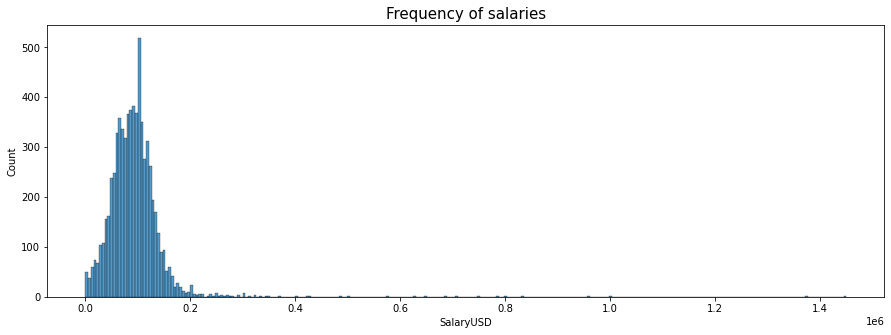

In [23]:
fig, ((axes1)) = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data = data, x = 'SalaryUSD', ax = axes1)
axes1.set_title('Frequency of salaries', fontsize=15)
plt.show()

__Comment:__ This is the illustration of our 'SalaryUSD' column. As we can see, the bar graph is skewed to the left.
Also we can say that there are many outliers.

In [24]:
def quartiles(column):
 sorted(column)
 Q1,Q3 = np.percentile(column , [25,75])
 IQR = Q3-Q1
 lower_boundary = Q1-(1.5*IQR)
 upper_boundary = Q3+(1.5*IQR)
 return lower_boundary,upper_boundary

__Comment:__ Function for detecting lower and upper boundaries of quartiles.

In [25]:
lower,upper = quartiles(data['SalaryUSD'])
data = data.drop(data[(data.SalaryUSD < lower) | (data.SalaryUSD > upper)].index)

__Comment:__ Dropping data that are less than the lower bound, and greater than the upper boundary, in other words, outliers.

In [26]:
data.shape

(6767, 23)

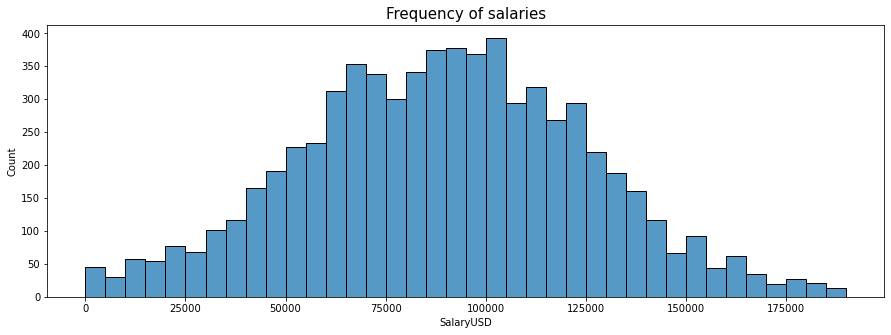

In [27]:
fig, ((axes1)) = plt.subplots(1,1, figsize=(15,5))
sns.histplot(data = data, x = 'SalaryUSD', ax = axes1)
axes1.set_title('Frequency of salaries', fontsize=15)
plt.show()

__Comment:__ After dropping all of our outliers, our salary distribution looks like a normal distribution now.

## <a id='section23'>2.3 Feature Engineering</a>

__Comment:__ Splitting 'SalaryUSD' into categories. In our case, we have splitted into 15 categories.

In [28]:
bins = np.linspace(min(data['SalaryUSD']), max(data['SalaryUSD']),16)
groupNames = np.arange(1,16)
data['Salary'] = pd.cut(data['SalaryUSD'], bins, labels = groupNames, include_lowest = True)

In [29]:
data.Salary.value_counts()

8     1007
6      892
7      827
9      780
10     719
5      645
4      452
11     414
12     258
3      257
2      160
13     122
1      119
14      76
15      39
Name: Salary, dtype: int64

__Comment:__ factorizing all of our categorical variables. We wrote a function that will loop through a list.

In [30]:
l1 = ['Country','PrimaryDatabase','EmploymentStatus','JobTitle','ManageStaff','TelecommuteDaysPerWeek','EmploymentSector','LookingForAnotherJob','OtherPeopleOnYourTeam','Education','Certifications','TelecommuteDaysPerWeek', 'EmploymentSector', 'CareerPlansThisYear']
def fctrz() :
    for i in l1:
        data[i]=data[i].factorize()[0]

fctrz()

__Comment:__ See the changes.

In [31]:
data.head()

,Survey Year,SalaryUSD,Country,PrimaryDatabase,YearsWithThisDatabase,OtherDatabases,EmploymentStatus,JobTitle,ManageStaff,YearsWithThisTypeOfJob,...,Certifications,HoursWorkedPerWeek,TelecommuteDaysPerWeek,EmploymentSector,LookingForAnotherJob,CareerPlansThisYear,Gender,OtherJobDuties,KindsOfTasksPerformed,Salary
1,2017,61515.0,0,0,15,"Oracle, PostgreSQL",0,0,0,3,...,0,35,0,0,0,0,Not Asked,Not Asked,Not Asked,5
2,2017,95000.0,1,0,5,"Oracle, MySQL/MariaDB, Informix",0,1,1,25,...,1,45,1,0,1,0,Not Asked,Not Asked,Not Asked,8
3,2017,56000.0,0,0,6,NaN,0,0,0,2,...,0,40,2,0,1,0,Not Asked,Not Asked,Not Asked,5
4,2017,35000.0,2,0,10,Oracle,1,0,0,10,...,1,40,1,0,1,0,Not Asked,Not Asked,Not Asked,3
6,2017,75000.0,1,0,16,Oracle,0,0,0,11,...,2,40,1,0,1,0,Not Asked,Not Asked,Not Asked,6


## <a id='section24'>2.4 Dealing with missing values</a>

### <a id='section22'>2.4.1 'OtherDatabases' column</a>

In [36]:
data.OtherDatabases.value_counts()

Microsoft SQL Server                                                       563
Oracle                                                                     265
Microsoft Access                                                           240
Azure SQL DB                                                               194
MySQL/MariaDB                                                              178
                                                                          ... 
PostgreSQL, Cassandra, Redshift                                              1
Microsoft SQL Server, Oracle, MySQL/MariaDB, Microsoft Access, Informix      1
Oracle, SQLite, Azure SQL DB, Amazon RDS (any flavor), Sybase                1
MySQL/MariaDB, Microsoft Access, Redis, SQLite, Amazon RDS (any flavor)      1
Oracle, Microsoft Access, Sybase SQL Anywhere                                1
Name: OtherDatabases, Length: 1304, dtype: int64

In [37]:
data['OtherDatabases1'] = data['OtherDatabases'].str.split(',').str.len()
data['OtherDatabases'] = data['OtherDatabases'].factorize()[0]
data.OtherDatabases.value_counts()

-1       1357
 21       563
 2        265
 8        240
 38       194
         ... 
 825        1
 829        1
 833        1
 837        1
 1303       1
Name: OtherDatabases, Length: 1305, dtype: int64

In [38]:
data['OtherDatabases1'] = data['OtherDatabases1'].fillna(data.groupby('Salary')['OtherDatabases1'].transform('median'))
data.OtherDatabases1.value_counts()

2.0     2701
1.0     1750
3.0     1161
4.0      594
5.0      301
6.0      134
7.0       73
8.0       32
10.0      10
9.0        8
11.0       2
12.0       1
Name: OtherDatabases1, dtype: int64

### <a id='section242'>2.4.2 'Gender' column </a>

In [39]:
data.Gender.value_counts()

Male                                                                          3458
Not Asked                                                                     2848
Female                                                                         394
Prefer not to say                                                               42
Non-binary/third gender                                                          8
Attack Helicopter                                                                2
Dragon                                                                           1
This question is inappropriate.                                                  1
There are only two genders for people, either male or female. I am a male.       1
Muppet                                                                           1
Meat Popsicle                                                                    1
Cyborg                                                                           1
Gray

In [40]:
data_female = data[(data.Gender == 'Female')]
data_male = data[(data.Gender == 'Male')]
frames = [data_female, data_male]
data_Gender = pd.concat(frames)
data_nonGender = data[(data.Gender!='Female') & (data.Gender!='Male')]

In [41]:
data_Gender['Gender'] = data_Gender['Gender'].factorize()[0]
data_nonGender['Gender'] = data_nonGender['Gender'].factorize()[0]

__Comment:__

non-missing values - train data

missing values - test data

In [42]:
list0 = ['Survey Year', 'SalaryUSD', 'Country', 'PrimaryDatabase','YearsWithThisDatabase', 'EmploymentStatus','JobTitle', 'ManageStaff', 'YearsWithThisTypeOfJob','OtherPeopleOnYourTeam', 'DatabaseServers', 'Education',
         'Certifications', 'HoursWorkedPerWeek','TelecommuteDaysPerWeek', 'EmploymentSector', 'LookingForAnotherJob','Salary']

X_train = data_Gender[list0]
y_train = data_Gender.Gender
X_test = data_nonGender[list0]
y_test = data_nonGender.Gender

In [43]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8982346832814122

In [44]:
predict = lr.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
# NewGender
df = pd.DataFrame(predict, columns=['Gender'])
df.value_counts()

Gender
1         2914
0            1
dtype: int64

In [46]:
df[df.Gender==0]

,Gender
587,0


In [47]:
data['Gender'] = data['Gender'].factorize()[0]

data.loc[data["Gender"] == 0, "Gender"] = 1
data.loc[(data["Gender"] != 1) & (data["Gender"] != 2), "Gender"] = 1
data.loc[data.index==587, "Gender"] = 2
data.Gender.value_counts()

1    6372
2     395
Name: Gender, dtype: int64

### <a id='section243'>2.4.3 'OtherJobDuties' column</a>

In [48]:
data['OtherJobDuties'] = data['OtherJobDuties'].replace('Not Asked', np.nan)

In [49]:
data.OtherJobDuties.value_counts()

DBA (Development Focus - tunes queries, indexes, does deployments)                                                                                                                                                                                                                                                          245
Developer: T-SQL                                                                                                                                                                                                                                                                                                            211
DBA (General - splits time evenly between writing & tuning queries AND building & troubleshooting servers)                                                                                                                                                                                                                  154
Developer: Business Intelligence (SSRS, 

In [50]:
data['OtherJobDuties'] = data['OtherJobDuties'].str.split(',').str.len()
data['OtherJobDuties'] = data['OtherJobDuties'].fillna(data.groupby('Salary')['OtherJobDuties'].transform('median'))
data.OtherJobDuties.value_counts()

3.0     2772
4.0     1685
1.0      743
2.0      344
5.0      305
6.0      276
7.0      223
8.0      142
9.0       88
10.0      66
11.0      54
12.0      38
14.0      11
13.0      10
17.0       4
16.0       3
15.0       3
Name: OtherJobDuties, dtype: int64

### <a id='section244'>2.4.4 'KindsOfTasksPerformed' column</a>

In [51]:
data['KindsOfTasksPerformed'] = data['KindsOfTasksPerformed'].replace("Not Asked", np.nan)
data['KindsOfTasksPerformed'] = data['KindsOfTasksPerformed'].str.split(',').str.len()
data['KindsOfTasksPerformed'] = data.groupby('Salary')['KindsOfTasksPerformed'].transform(lambda x: x.fillna(x.median()))
data['KindsOfTasksPerformed'].value_counts()

4.0    3517
3.0    1081
5.0     715
6.0     484
2.0     433
1.0     249
7.0     235
8.0      53
Name: KindsOfTasksPerformed, dtype: int64

### <a id='section245'>2.4.5 'EducationUsComputerRelated' column</a>

In [52]:
data_edu1 = data[(data.EducationIsComputerRelated=='Yes')]
data_edu0 = data[(data.EducationIsComputerRelated=='No')]
frames0 = [data_edu0, data_edu1]
data_edu = pd.concat(frames0)
data_nonedu = data[(data.EducationIsComputerRelated!='Yes') & (data.EducationIsComputerRelated!='No')]
data_edu['EducationIsComputerRelated'] = data_edu['EducationIsComputerRelated'].factorize()[0]
data_nonedu['EducationIsComputerRelated'] = data_nonedu['EducationIsComputerRelated'].factorize()[0]
data_edu.EducationIsComputerRelated.value_counts()

1    3718
0    1855
Name: EducationIsComputerRelated, dtype: int64

In [54]:
# non-missing values - train data
# missing values - test data

X_train = data_edu[list0]
y_train = data_edu.EducationIsComputerRelated

X_test = data_nonedu[list0]
y_test = data_nonedu.EducationIsComputerRelated

In [55]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6673246007536336

In [56]:
predict = lr.predict(X_test)
df = pd.DataFrame(predict, columns=['EducationIsComputerRelated1'])
df.value_counts()

EducationIsComputerRelated1
1                              1194
dtype: int64

In [57]:
data['EducationIsComputerRelated'] = data['EducationIsComputerRelated'].replace(np.nan, 'Yes')
data.EducationIsComputerRelated.value_counts()

Yes    4912
No     1855
Name: EducationIsComputerRelated, dtype: int64

In [58]:
data['EducationIsComputerRelated'] = data['EducationIsComputerRelated'].factorize()[0]
data = data.drop(['Salary'], axis = 1)

__Comment:__ dropping 'Salary' column, because now we don't need it now (used it for filling missing values)

## <a id='section25'>2.5 Correlation matrix</a>

<AxesSubplot:>

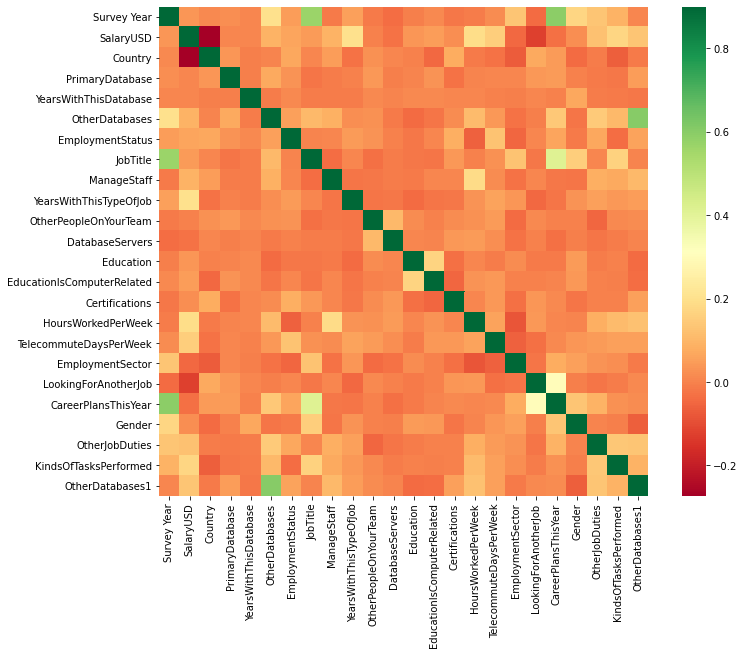

In [59]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap="RdYlGn")

In [60]:
corr = data.corr()
corr["SalaryUSD"].sort_values(ascending=False)

SalaryUSD                     1.000000
YearsWithThisTypeOfJob        0.201617
HoursWorkedPerWeek            0.192819
KindsOfTasksPerformed         0.173365
TelecommuteDaysPerWeek        0.156718
OtherDatabases1               0.132355
OtherJobDuties                0.122172
OtherDatabases                0.093021
ManageStaff                   0.091407
EmploymentStatus              0.065426
EducationIsComputerRelated    0.051778
JobTitle                      0.043670
Education                     0.038634
Survey Year                   0.037426
Gender                        0.021942
Certifications                0.020745
YearsWithThisDatabase         0.007592
PrimaryDatabase               0.007259
OtherPeopleOnYourTeam        -0.001326
DatabaseServers              -0.028883
CareerPlansThisYear          -0.031690
EmploymentSector             -0.044177
LookingForAnotherJob         -0.124271
Country                      -0.272781
Name: SalaryUSD, dtype: float64

## <a id='section3'>3. Models</a>
### <a id='section31'>3.1 Feature Selection using Wrapper method</a> [(link)](https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/)

In [61]:
X = data.drop(['SalaryUSD'], axis = 1)
y = data.SalaryUSD

### Forward Selection
In Forward Selection - we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. 

In [62]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [63]:
forward_selection(X,y)

['Country',
 'YearsWithThisTypeOfJob',
 'HoursWorkedPerWeek',
 'KindsOfTasksPerformed',
 'TelecommuteDaysPerWeek',
 'LookingForAnotherJob',
 'OtherDatabases1',
 'EmploymentStatus',
 'ManageStaff',
 'OtherJobDuties',
 'EmploymentSector',
 'Education',
 'Certifications',
 'DatabaseServers',
 'EducationIsComputerRelated',
 'JobTitle']

### Backward elimination
In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). 

In [64]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [65]:
backward_elimination(X, y)

['Country',
 'EmploymentStatus',
 'JobTitle',
 'ManageStaff',
 'YearsWithThisTypeOfJob',
 'DatabaseServers',
 'Education',
 'EducationIsComputerRelated',
 'Certifications',
 'HoursWorkedPerWeek',
 'TelecommuteDaysPerWeek',
 'EmploymentSector',
 'LookingForAnotherJob',
 'OtherJobDuties',
 'KindsOfTasksPerformed',
 'OtherDatabases1']

__Comment:__ This above function returns the final list of significant features based on p-values through backward elimination.

## <a id='section32'>3.2 Linear Regression</a>

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

__Comment:__ Function for evalusting MAE, MSE, RMSE, R-squared.

In [67]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

__Comment:__ Defining as X columns that were chosen in backward elimination.

In [68]:
X = data[['Country','EmploymentStatus','JobTitle','ManageStaff','YearsWithThisTypeOfJob','DatabaseServers','Education','EducationIsComputerRelated','Certifications','HoursWorkedPerWeek','TelecommuteDaysPerWeek','EmploymentSector','LookingForAnotherJob','OtherJobDuties','KindsOfTasksPerformed','OtherDatabases1']]
y = data['SalaryUSD']

In [69]:
# Test, Train splitting with random_state=42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

In [71]:
test_pred = rfe.predict(X_test)
train_pred = rfe.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 27267.90231019051
MSE: 1158896386.8181036
RMSE: 34042.567277132664
R2 Square 0.09271630872487868
__________________________________
Train set evaluation:
_____________________________________
MAE: 26589.873028577276
MSE: 1105312735.4374127
RMSE: 33246.24392976465
R2 Square 0.08755628142524108
__________________________________


### Linear Regression with Hyperparameter Tuning (using Grid Search Cross-Validation)

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [75]:
# creating a CV scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specifying hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

__Comment:__ As a next step, we will create Grid Search

In [76]:
# our model
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, 
                        scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)      
# model fitting
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression(normalize=True)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

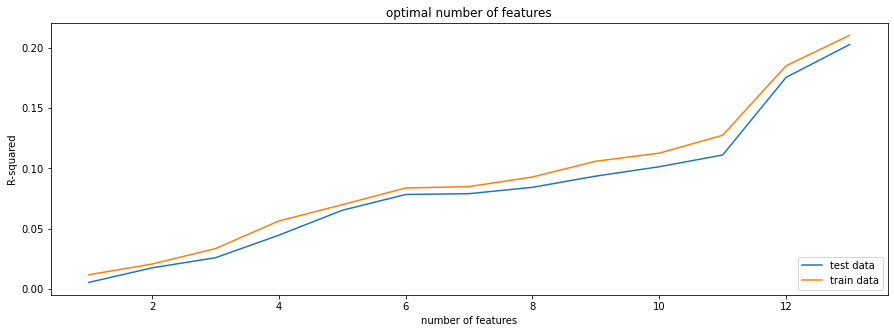

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_) # cv results

plt.figure(figsize=(15,5))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('R-squared')
plt.title("optimal number of features")
plt.legend(['test data', 'train data'], loc='lower right')

__Comment:___ Plotting CV results

In [78]:
# best parameters
model_cv.best_params_

{'n_features_to_select': 13}

In [79]:
# inserting best number of features
n_features_optimal = 13

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

test_pred = rfe.predict(X_test)
train_pred = rfe.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 25266.293789541865
MSE: 1015738465.282768
RMSE: 31870.652100055435
R2 Square 0.20479263320326357
__________________________________
Train set evaluation:
_____________________________________
MAE: 24528.39416659507
MSE: 957377984.3570709
RMSE: 30941.525242900858
R2 Square 0.2096774965840993
__________________________________


__Comment:__ As it can be from above our R-squared has increased from 0.0927 to 0.2047 for our test set.

In [80]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

## <a id='section33'>3.3 Polynomial Regression</a>

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 24793.662304895577
MSE: 968460435.2881626
RMSE: 31120.0969678464
R2 Square 0.24180593832495267
__________________________________
Train set evaluation:
_____________________________________
MAE: 23247.728742661453
MSE: 863999107.0671678
RMSE: 29393.861724298284
R2 Square 0.2867624403281134
__________________________________


In [83]:
results_df2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df2, ignore_index=True)

## <a id='section34'>3.4 Ridge Regression</a>

In [84]:
from sklearn.linear_model import Ridge

In [85]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 25176.14433029998
MSE: 1007800423.1711515
RMSE: 31745.87253756229
R2 Square 0.21100721479178575
__________________________________
Train set evaluation:
_____________________________________
MAE: 24476.16233514473
MSE: 952567089.1979089
RMSE: 30863.68560619274
R2 Square 0.21364892559958237
__________________________________


### Ridge Regression with Grid Search

__Comment:__ Checking for alpha from .0001 to 1 and finding the best value for alpha

In [86]:
alpha_space = np.logspace(-4, 0, 30)   
alpha_space

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])

In [87]:
ridge_scores = []
ridge = Ridge(normalize = True)
for alpha in alpha_space:
    ridge.alpha = alpha
    val = np.mean(cross_val_score(ridge, X, y, cv = 10))
    ridge_scores.append(val)

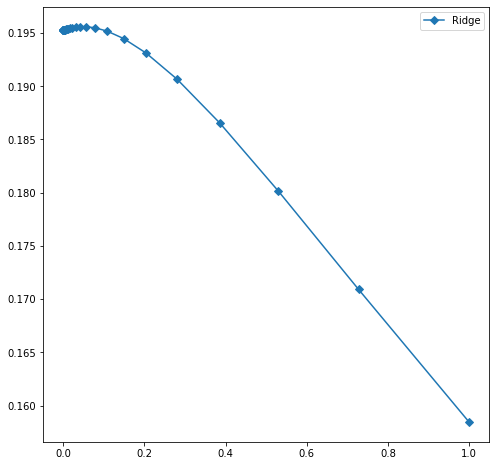

In [88]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.legend()
plt.show()

__Comment:__ Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

In [89]:
params = {'alpha': (np.logspace(-8, 8, 100))} # will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.029150530628251816}
0.2056596637125793


__Comment:__ Using value of alpha as 0.029150 to get best accuracy for Ridge Regression

In [90]:
ridge = Ridge(alpha = 0.029150, normalize = True)
ridge.fit(X_train, y_train)
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 25181.8534001059
MSE: 1007379321.7320774
RMSE: 31739.23946366827
R2 Square 0.2113368891892471
__________________________________
Train set evaluation:
_____________________________________
MAE: 24488.124759648144
MSE: 952608995.1228464
RMSE: 30864.36448597065
R2 Square 0.21361433195313795
__________________________________


__Comment:__ For the Ridge Regression R-squared for test data has changed from 0.2110 to 0.2113.

In [91]:
results_df3 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df3, ignore_index=True)

## <a id='section35'>3.5 Lasso Regression</a>

In [92]:
from sklearn.linear_model import Lasso

In [93]:
model = Lasso(alpha=0.01, 
              fit_intercept = True,
              normalize = False,
              precompute=True, 
              warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26313.801041339633
MSE: 1110936690.4565876
RMSE: 33330.71692083126
R2 Square 0.13026328086341554
__________________________________
Train set evaluation:
_____________________________________
MAE: 25696.68614083319
MSE: 1052339277.5366223
RMSE: 32439.779246114213
R2 Square 0.13128625699060237
__________________________________


### Lasso Regression with Grid Search

__Comment:__ Checking for alpha from .0001 to 1 and finding the best value for alpha

In [94]:
alpha_space = np.logspace(-4, 0, 30)   
alpha_space

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])

In [95]:
lasso_scores = []
lasso = Lasso(normalize = True)
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, X, y, cv = 10))
    lasso_scores.append(val)

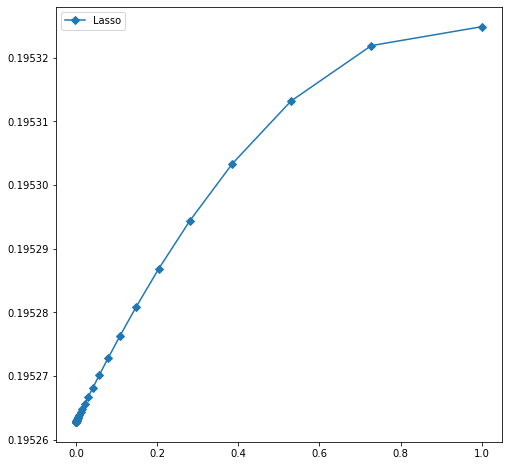

In [96]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

__Comment:__ Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha.

In [97]:
params = {'alpha': (np.logspace(-8, 8, 100))} # will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.572236765935022}
0.20552347121489825


__Comment:__ Using value of alpha as 0.572236 to get best accuracy for Lasso Regression.

In [98]:
lasso = Lasso(alpha = 0.572236, normalize = True)
lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 25172.837057559882
MSE: 1007286535.8740538
RMSE: 31737.777740006528
R2 Square 0.21140952993325435
__________________________________
Train set evaluation:
_____________________________________
MAE: 24475.706235570327
MSE: 952484756.0378914
RMSE: 30862.351758054527
R2 Square 0.21371689222321733
__________________________________


__Comment:__ R-squared (test data) has increased from 0.1302 till 0.2114.

In [99]:
results_df4 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df4, ignore_index=True)

## <a id='section36'>3.6 Random Forest Regressor</a>

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17220.381052397493
MSE: 536073496.3986552
RMSE: 23153.261031626953
R2 Square 0.5803155949577816
__________________________________
Train set evaluation:
_____________________________________
MAE: 6321.64545014251
MSE: 73155014.3880456
RMSE: 8553.070465513867
R2 Square 0.9396100024721031
__________________________________


### Random Forest Regressor with Grid-Search

In [102]:
param_grid = {'max_depth': range(1, 10), 'n_estimators': [10, 50, 100, 200] }

rfc_gs = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=param_grid, cv=5, 
                      scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

rfc_gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [103]:
rfc_gs.best_params_

{'max_depth': 9, 'n_estimators': 200}

__Comment:__ Best parameters for our Random Forest Regressor. Maximum depth of the tree is 9, and the number of trees is 200.

In [104]:
random_forest = RandomForestRegressor(max_depth=9, n_estimators=200, 
                                random_state=42, verbose=False)
random_forest.fit(X_train, y_train)

test_pred = random_forest.predict(X_test)
train_pred = random_forest.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17495.36095737418
MSE: 549631347.8293318
RMSE: 23444.217790946488
R2 Square 0.569701343647915
__________________________________
Train set evaluation:
_____________________________________
MAE: 13862.433897297962
MSE: 331313854.33916354
RMSE: 18202.028852278076
R2 Square 0.7264979986420503
__________________________________


In [105]:
results_df5 = pd.DataFrame(data=[["Random Forest", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df5, ignore_index=True)

## <a id='section37'>3.7 K Neighbors Regressor</a>

In [106]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [108]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

test_pred = knn.predict(X_test_scaled)
train_pred = knn.predict(X_train_scaled)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26701.108847806627
MSE: 1147255134.210274
RMSE: 33871.15489926899
R2 Square 0.101830081756907
__________________________________
Train set evaluation:
_____________________________________
MAE: 21424.337934524596
MSE: 740763824.9008259
RMSE: 27216.976777387048
R2 Square 0.3884940638898089
__________________________________


### K Neighbors Regressor with Grid-Search

In [109]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,7]}

knn = neighbors.KNeighborsRegressor()
knn = GridSearchCV(knn, params, cv=5)
knn.fit(X_train_scaled,y_train)
knn.best_params_

{'n_neighbors': 12}

In [110]:
knn = neighbors.KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train_scaled, y_train);

In [111]:
test_pred = knn.predict(X_test_scaled)
train_pred = knn.predict(X_train_scaled)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 26191.659013055807
MSE: 1092249938.2375546
RMSE: 33049.20480492011
R2 Square 0.14489287650636828
__________________________________
Train set evaluation:
_____________________________________
MAE: 23613.19629833076
MSE: 882310983.8023442
RMSE: 29703.720033058893
R2 Square 0.27164585262706353
__________________________________


In [112]:
results_df6 = pd.DataFrame(data=[["K Neighbors", *evaluate(y_test, test_pred) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df6, ignore_index=True)

## <a id='section4'>4. Conclusion</a>

In [113]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,25266.293790,1.015738e+09,31870.652100,0.204793
1,Polynomial Regression,24793.662305,9.684604e+08,31120.096968,0.241806
2,Ridge Regression,25181.853400,1.007379e+09,31739.239464,0.211337
3,Lasso Regression,25172.837058,1.007287e+09,31737.777740,0.211410
4,Random Forest,17495.360957,5.496313e+08,23444.217791,0.569701
5,K Neighbors,26191.659013,1.092250e+09,33049.204805,0.144893


- __Mean absolute error (MAE)__

In simple terms, mean absolute error is the sum of absolute/positive errors of all values.

- __Mean Square Error (MSE)__

Mean square error is always positive and a value closer to 0 or a lower value is better.

- __Root mean square error (RMSE)__

Square root of MSE yields root mean square error (RMSE). 

- __R2 Square__

The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. 

In conclusion, the highest R-squared is in Random Forest Regressor - 0.569, however there is an enormous gap between test and train set evaluation. We can suppose that there is an overfitting, despite the fact that we have tuned hyperparameters.

Because of this fact, we assume that Polynomial with a degree 2 did a better job than other models.

For the Linear Regression, R-squared has increased from 0.0927 to 0.2047 for our test set when we used Grid-Search.

For the Ridge Regression, nothing has changed drastically, performance increaseg only by 0.0003. 
Ridge didn't overfit the training data much during its training phase, and hence performed good on test set.

For the Lasso Regression, before tuning R-squared was 0.1302, and after hyperparameters tuning became 0.2114.

K Neighbors Regressor unlike other models showed the poorest performance.